In [7]:
pip install geopandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install geodatasets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install geopandas matplotlib geodatasets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install adjustText


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


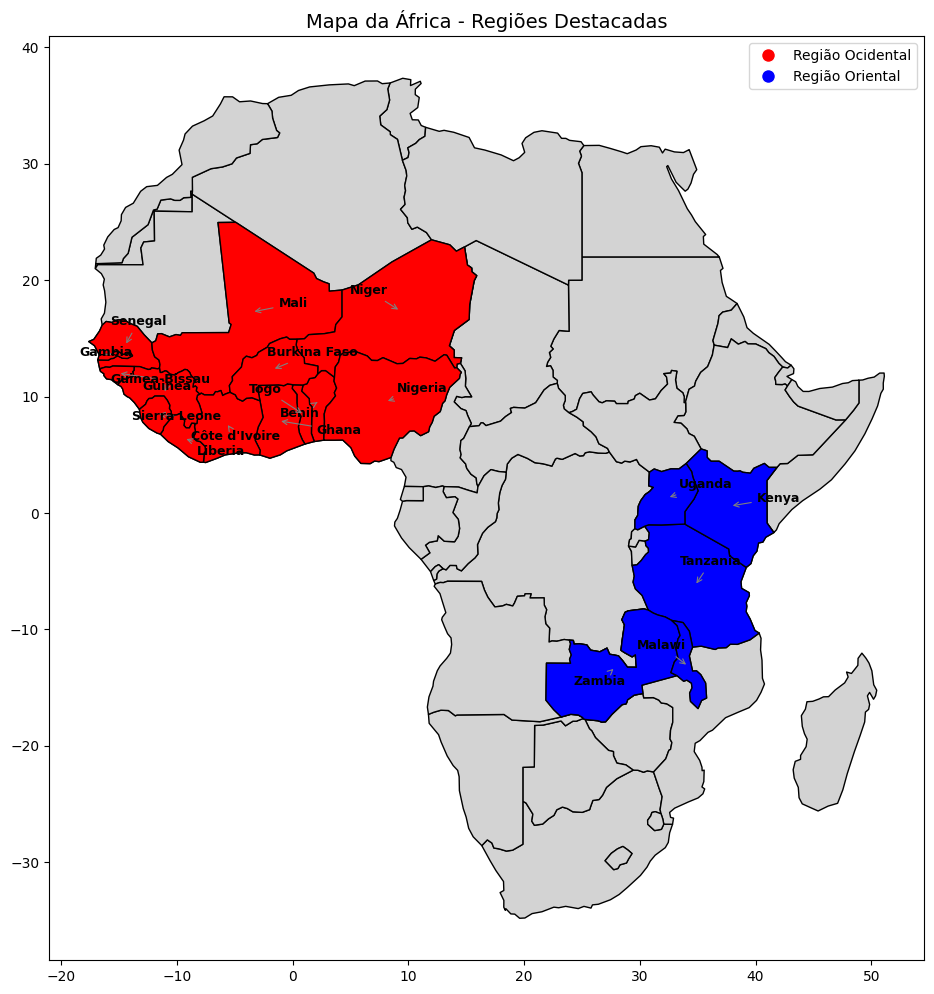

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Baixar o conjunto de dados correto diretamente do Natural Earth
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Filtrar apenas os países da África
africa = world[world["CONTINENT"] == "Africa"]

# Definir listas de países a destacar
regiao_ocidental = [
    "Benin", "Burkina Faso", "Côte d'Ivoire", "Gambia", "Ghana", "Guinea", 
    "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Senegal", 
    "Sierra Leone", "Togo"
]

regiao_oriental = [
    "Kenya", "Malawi", "Tanzania", "Uganda", "Zambia"
]

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 12))

# Plotar todos os países da África em cinza
africa.plot(ax=ax, color="lightgray", edgecolor="black")

# Destacar Região Ocidental em vermelho
ocidental = africa[africa["NAME"].isin(regiao_ocidental)]
ocidental.plot(ax=ax, color="red", edgecolor="black")

# Destacar Região Oriental em azul
oriental = africa[africa["NAME"].isin(regiao_oriental)]
oriental.plot(ax=ax, color="blue", edgecolor="black")

# Função para deslocamento dos textos
def annotate_countries(df, ax, color):
    np.random.seed(42)  # Para manter os deslocamentos consistentes
    for _, row in df.iterrows():
        x, y = row["geometry"].centroid.x, row["geometry"].centroid.y
        dx, dy = np.random.uniform(-5, 5), np.random.uniform(-2, 2)  # Deslocamento aleatório
        
        ax.annotate(
            row["NAME"], 
            xy=(x, y), xytext=(x + dx, y + dy),
            fontsize=9, color="black", weight="bold",
            arrowprops=dict(arrowstyle="->", color="gray", lw=0.8)
        )

# Adicionar nomes deslocados dos países no mapa
annotate_countries(ocidental, ax, "red")
annotate_countries(oriental, ax, "blue")

# Criar uma legenda personalizada
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Região Ocidental'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Região Oriental')
]

# Adicionar título e legenda personalizada
plt.title("Mapa da África - Regiões Destacadas", fontsize=14)
plt.legend(handles=legend_elements)

# Mostrar o mapa
# plt.show()
plt.savefig('mapa_paises.png', bbox_inches='tight')

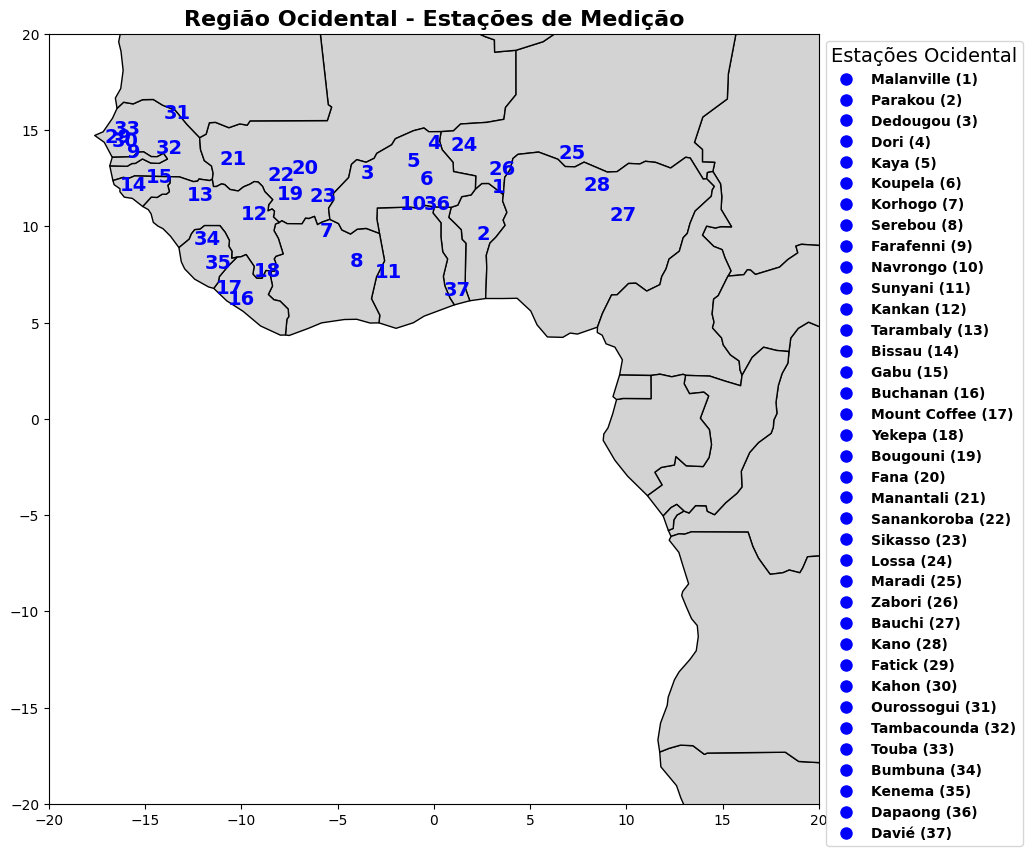

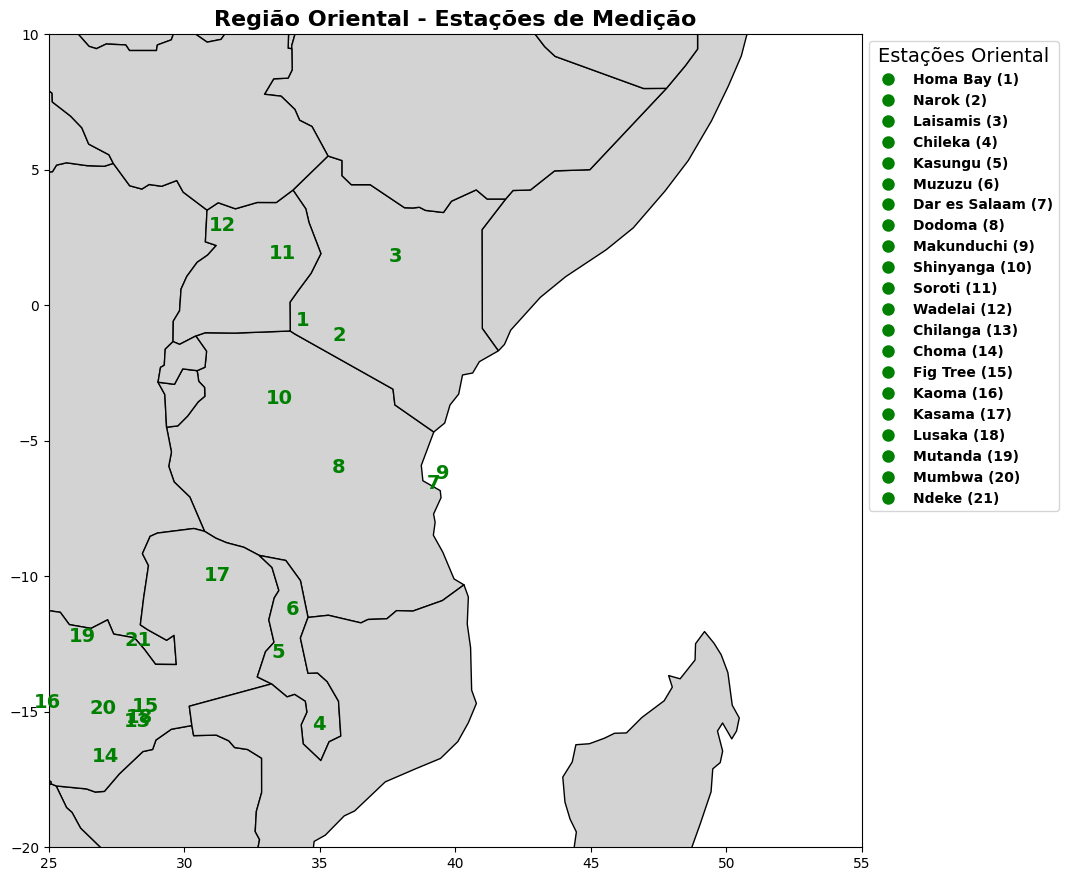

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Coordinates and regions of the stations
stations = {
    "Malanville": (11.782, 3.373, "Ocidental"),
    "Parakou": (9.331, 2.591, "Ocidental"),
    "Dedougou": (12.466, -3.472, "Ocidental"),
    "Dori": (14.030, -0.024, "Ocidental"),
    "Kaya": (13.083, -1.072, "Ocidental"),
    "Koupela": (12.191, -0.362, "Ocidental"),
    "Korhogo": (9.480, -5.595, "Ocidental"),
    "Serebou": (7.932, -4.005, "Ocidental"),
    "Farafenni": (13.573, -15.592, "Ocidental"),
    "Navrongo": (10.875, -1.062, "Ocidental"),
    "Sunyani": (7.348, -2.340, "Ocidental"),
    "Kankan": (10.364, -9.304, "Ocidental"),
    "Tarambaly": (11.356, -12.137, "Ocidental"),
    "Bissau": (11.856, -15.588, "Ocidental"),
    "Gabu": (12.301, -14.242, "Ocidental"),
    "Buchanan": (5.923, -9.993, "Ocidental"),
    "Mount Coffee": (6.497, -10.651, "Ocidental"),
    "Yekepa": (7.393, -8.668, "Ocidental"),
    "Bougouni": (11.407, -7.481, "Ocidental"),
    "Fana": (12.766, -6.691, "Ocidental"),
    "Manantali": (13.200, -10.430, "Ocidental"),
    "Sanankoroba": (12.391, -7.937, "Ocidental"),
    "Sikasso": (11.305, -5.737, "Ocidental"),
    "Lossa": (13.947, 1.574, "Ocidental"),
    "Maradi": (13.524, 7.167, "Ocidental"),
    "Zabori": (12.705, 3.555, "Ocidental"),
    "Bauchi": (10.285, 9.850, "Ocidental"),
    "Kano": (11.873, 8.458, "Ocidental"),
    "Fatick": (14.367, -16.413, "Ocidental"),
    "Kahon": (14.168, -16.034, "Ocidental"),
    "Ourossogui": (15.612, -13.314, "Ocidental"),
    "Tambacounda": (13.776, -13.729, "Ocidental"),
    "Touba": (14.772, -15.919, "Ocidental"),
    "Bumbuna": (9.035, -11.764, "Ocidental"),
    "Kenema": (7.818, -11.181, "Ocidental"),
    "Dapaong": (10.891, 0.189, "Ocidental"),
    "Davié": (6.393, 1.186, "Ocidental"),
    "Homa Bay": (-0.764, 34.360, "Oriental"),
    "Narok": (-1.321, 35.705, "Oriental"),
    "Laisamis": (1.601, 37.802, "Oriental"),
    "Chileka": (-15.679, 34.972, "Oriental"),
    "Kasungu": (-13.015, 33.468, "Oriental"),
    "Muzuzu": (-11.419, 33.995, "Oriental"),
    "Dar es Salaam": (-6.780, 39.203, "Oriental"),
    "Dodoma": (-6.180, 35.699, "Oriental"),
    "Makunduchi": (-6.417, 39.516, "Oriental"),
    "Shinyanga": (-3.624, 33.515, "Oriental"),
    "Soroti": (1.724, 33.622, "Oriental"),
    "Wadelai": (2.725, 31.390, "Oriental"),
    "Chilanga": (-15.548, 28.248, "Oriental"),
    "Choma": (-16.838, 27.070, "Oriental"),
    "Fig Tree": (-15.001, 28.549, "Oriental"),
    "Kaoma": (-14.839, 24.931, "Oriental"),
    "Kasama": (-10.171, 31.225, "Oriental"),
    "Lusaka": (-15.394, 28.337, "Oriental"),
    "Mutanda": (-12.423, 26.215, "Oriental"),
    "Mumbwa": (-15.085, 27.001, "Oriental"),
    "Ndeke": (-12.577, 28.292, "Oriental"),
}

# Load the world map
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Filter Africa from the world map
africa = world[world["CONTINENT"] == "Africa"]

# Split stations by region
ocidental_stations = {station: coords for station, coords in stations.items() if coords[2] == "Ocidental"}
oriental_stations = {station: coords for station, coords in stations.items() if coords[2] == "Oriental"}

# Define the bounding boxes for the Ocidental and Oriental regions
ocidental_bbox = [-20, 20, -20, 20]  # [min_lon, max_lon, min_lat, max_lat]
oriental_bbox = [25, 55, -20, 10]

# Function to plot stations on the map
def plot_stations(stations, region_name, ax, bbox):
    # Plot all African countries
    africa.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Filter the map to the region bounding box
    ax.set_xlim(bbox[0], bbox[1])
    ax.set_ylim(bbox[2], bbox[3])

    # Prepare the legend elements (station number + name)
    legend_elements = []

    # Plot the stations without arrows and place numbers directly at the station coordinates
    for idx, (station, coords) in enumerate(stations.items(), 1):
        lat, lon, region = coords
        color = 'blue' if region == "Ocidental" else 'green'

        # Plot the station number directly at the station position
        ax.text(lon, lat, str(idx), fontsize=14, ha='center', color=color, fontweight='bold', zorder=5)

        # Add the station to the legend list
        legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{station} ({idx})'))

    # Add a custom legend with padding
    ax.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1, 1), title=f"Estações {region_name}", title_fontsize=14, prop={'weight': 'bold'})

    # Set title
    ax.set_title(f"Região {region_name} - Estações de Medição", fontsize=16, fontweight='bold')

# Create individual plots: one for Ocidental and one for Oriental
fig1, ax1 = plt.subplots(figsize=(15, 10))  # Larger plot for Ocidental
plot_stations(ocidental_stations, "Ocidental", ax1, ocidental_bbox)
plt.savefig("mapa_estacoes_ocidental.png", bbox_inches='tight')

fig2, ax2 = plt.subplots(figsize=(15, 10))  # Larger plot for Oriental
plot_stations(oriental_stations, "Oriental", ax2, oriental_bbox)

plt.tight_layout(pad=5.0)  # Add padding between the plots
# plt.show()
plt.savefig("mapa_estacoes_oriental.png", bbox_inches='tight')